<a href="https://colab.research.google.com/github/sid-0837/siddharth/blob/main/pptself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('/content/shopping_trends.csv')

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [11]:
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


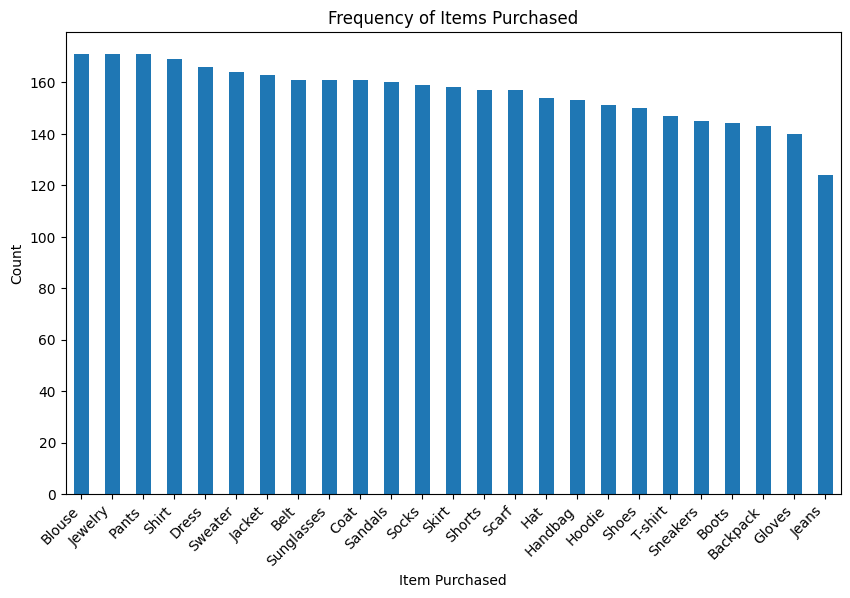

In [19]:
item_counts = data['Item Purchased'].value_counts()
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar')
plt.title('Frequency of Items Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

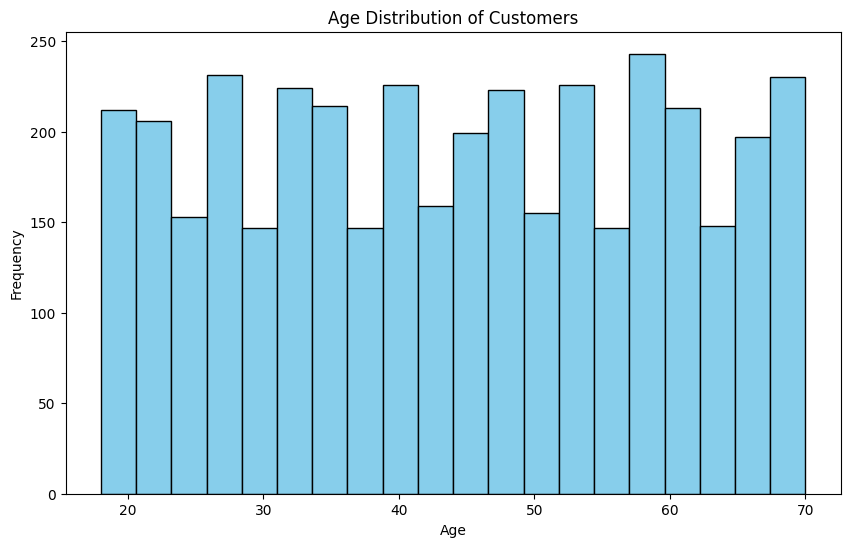

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

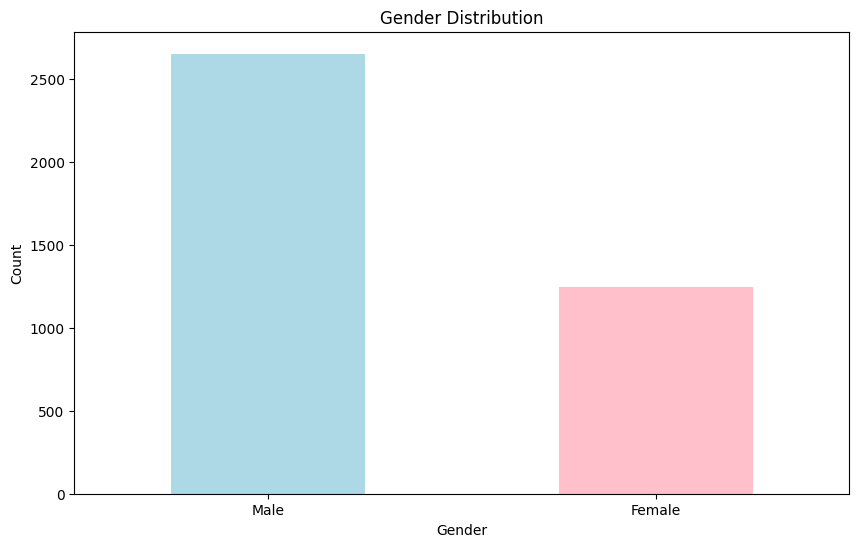

In [21]:
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [22]:
bins = [0, 50, 150, np.inf]  # Define the bins (Low, Medium, High)
labels = ['Low', 'Medium', 'High']
data['Purchase Category'] = pd.cut(data['Purchase Amount (USD)'], bins=bins, labels=labels)

In [23]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Encode Gender as 0 and 1
data['Item Purchased'] = label_encoder.fit_transform(data['Item Purchased'])
data['Category'] = label_encoder.fit_transform(data['Category'])
data['Purchase Category'] = label_encoder.fit_transform(data['Purchase Category'])


In [25]:
X = data[['Age', 'Gender', 'Item Purchased', 'Category']]  # Features
y = data['Purchase Category']  # Target (Purchase Category)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)


In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)

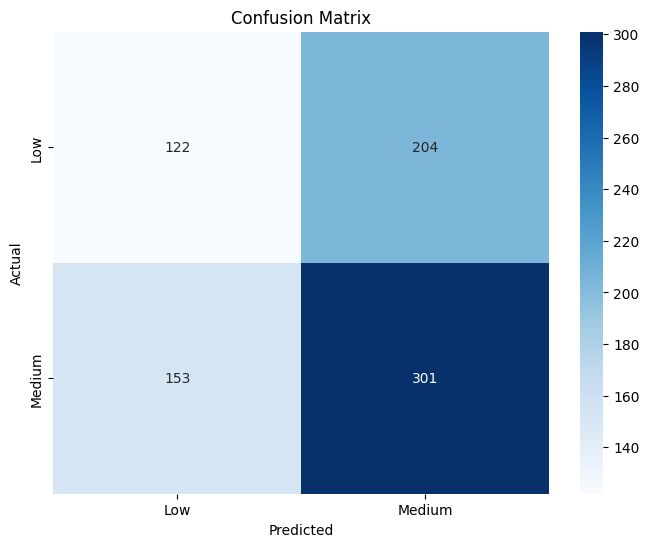

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

         Low       0.44      0.37      0.41       326
      Medium       0.60      0.66      0.63       454

    accuracy                           0.54       780
   macro avg       0.52      0.52      0.52       780
weighted avg       0.53      0.54      0.54       780

